In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- 1. Data Definition (5x6 Resolution) ---
A = np.array([
    0, 1, 1, 1, 1, 0,
    1, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1
])

B = np.array([
    1, 1, 1, 1, 1, 0,
    1, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 1, 0,
    1, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 1, 0
])

C = np.array([
    0, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 1
])

In [3]:
# --- 2. Prepare Training Data ---
X = np.array([A, B, C])
y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

In [4]:
# --- 3. Neural Network Implementation ---
def sigmoid(x):
    """Computes the sigmoid of x."""
    return 1 / (1 + np.exp(-x))

In [5]:
# Derivative of the sigmoid function for backpropagation
def sigmoid_derivative(x):
    """Computes the derivative of the sigmoid function."""
    return x * (1 - x)

In [6]:
# --- 4. Network Configuration and Initialization ---
input_neurons = X.shape[1]   # 30 neurons 
hidden_neurons = 5           # Number of neurons in the hidden layer
output_neurons = y.shape[1]  # 3 neurons 
learning_rate = 0.1
epochs = 10000


In [7]:
np.random.seed(42)

In [8]:
# Initialize weights with random values
weights_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
weights_output = np.random.uniform(size=(hidden_neurons, output_neurons))

In [9]:
losses = []
accuracies = []

In [10]:
#--- 5. Training the Neural Network ---
for epoch in range(epochs):
    # --- Feedforward ---
    hidden_layer_input = np.dot(X, weights_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_output)
    predicted_output = sigmoid(output_layer_input)
    
    # --- Backpropagation ---
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(weights_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # --- Update Weights ---
    weights_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_hidden += X.T.dot(d_hidden_layer) * learning_rate
    
    # --- Track Performance ---
    loss = np.mean(np.square(error))
    losses.append(loss)

    predictions = np.argmax(predicted_output, axis=1)
    true_labels = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == true_labels)
    accuracies.append(accuracy)
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch 0, Loss: 0.5529, Accuracy: 0.3333
Epoch 1000, Loss: 0.2222, Accuracy: 0.6667
Epoch 2000, Loss: 0.2221, Accuracy: 0.3333
Epoch 3000, Loss: 0.2218, Accuracy: 1.0000
Epoch 4000, Loss: 0.1203, Accuracy: 0.6667
Epoch 5000, Loss: 0.0154, Accuracy: 1.0000
Epoch 6000, Loss: 0.0060, Accuracy: 1.0000
Epoch 7000, Loss: 0.0037, Accuracy: 1.0000
Epoch 8000, Loss: 0.0026, Accuracy: 1.0000
Epoch 9000, Loss: 0.0020, Accuracy: 1.0000


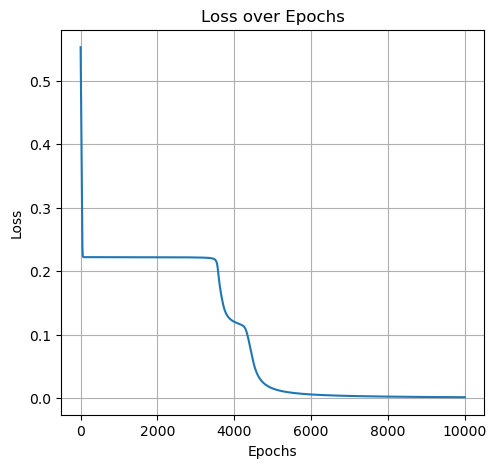

In [11]:
# --- 6. Visualize Training Results ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig('loss_plot.png')

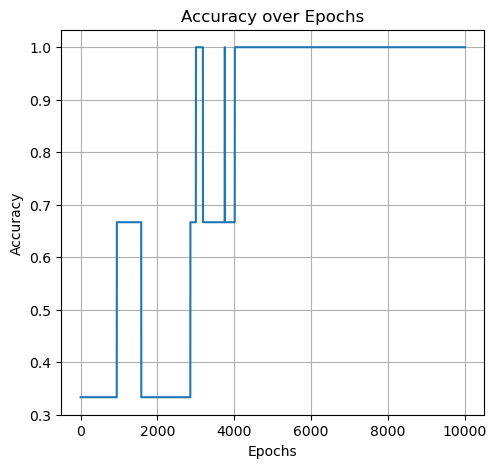

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('accuracy_plot.png')

In [13]:
# --- 7. Test the Trained Model ---
test_letter = B
test_letter_name = "B"

In [14]:
hidden_layer_input_test = np.dot(test_letter, weights_hidden)
hidden_layer_output_test = sigmoid(hidden_layer_input_test)
output_layer_input_test = np.dot(hidden_layer_output_test, weights_output)
predicted_output_test = sigmoid(output_layer_input_test)

In [15]:
predicted_class_index = np.argmax(predicted_output_test)
class_labels = ['A', 'B', 'C']
predicted_letter = class_labels[predicted_class_index]

In [16]:
print(f"\n--- Prediction ---")
print(f"The predicted class for the input letter '{test_letter_name}' is: {predicted_letter}")


--- Prediction ---
The predicted class for the input letter 'B' is: B


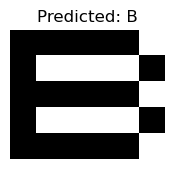

In [17]:
# Visualize the test letter and its prediction
plt.figure(figsize=(2, 2))
plt.imshow(test_letter.reshape(5, 6), cmap='gray_r')
plt.title(f'Predicted: {predicted_letter}')
plt.axis('off')
plt.savefig('prediction.png')
plt.show()